# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [1]:
 #%pip install --upgrade plotly

### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [4]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [5]:
df_data.shape


(962, 16)

In [6]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [7]:
print(df_data.columns)
df_data.isna().sum(0)

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')


year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [8]:
df_data.duplicated().sum()

0

### Check for NaN Values

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [9]:
df_data.birth_date=pd.to_datetime(df_data.birth_date)
df_data.loc[2].birth_date.year

1854

#### Add a Column with the Prize Share as a Percentage

In [10]:
seprated_values=df_data.prize_share.str.split('/',expand=True)
seprated_values

,0,1
0,1,1
1,1,1
2,1,1
3,1,2
4,1,2
...,...,...
957,1,3
958,1,1
959,1,4
960,1,4


In [11]:
numerator=pd.to_numeric(seprated_values[0])
denomenator =pd.to_numeric(seprated_values[1])
df_data["share_pct"]=numerator/denomenator

In [12]:
df_data.tail()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR,0.33
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA,0.25
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU,0.25
961,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery that black hole formation i...,1/2,Individual,Roger Penrose,1931-08-08,Colchester,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR,0.50


In [13]:
df_data.groupby('sex').sex.count()

sex
Female     58
Male      876
Name: sex, dtype: int64

In [14]:
# mydf=pd.DataFrame(df_data.groupby('birth_country_current').birth_country_current.count()[:10])
mydf2=pd.DataFrame(df_data.groupby('birth_country_current').birth_country_current.count()[:10])
# mydf.sort_values('no')
mydf['country']=mydf2.index
mydf['count']=mydf2.values
mydf.sort_values('count',ascending=False)[['count','birth_country_current']]
# mydf['count','birth_country_current']

NameError: ignored

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

In [15]:
px.pie(labels=df_data.groupby('sex').sex.count().index, values=df_data.groupby('sex').sex.count().values,hole=0.6,
       names=df_data.groupby('sex').sex.count().index)

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [ ]:
df_data[df_data.sex=='Female'].sort_values('year')[:3]


# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [16]:
df_data[df_data.duplicated('full_name',keep=False)]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,Sorbonne University,Paris,France,POL,1.00
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,1.00
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
297,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,United States of America,Male,University of Illinois,"Urbana, IL",United States of America,USA,0.33
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,GBR,1.00
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,1.00
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50


# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [17]:
df_data.groupby('category').count()
# df_data.category.value_counts().count()

,year,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
category,,,,,,,,,,,,,,,,
Chemistry,186,186,186,186,186,186,186,186,186,186,186,184,185,186,186,186
Economics,86,86,86,86,86,86,86,86,86,86,86,84,84,84,86,86
Literature,117,117,117,117,117,117,117,116,117,117,117,0,0,0,117,117
Medicine,222,222,222,222,222,222,222,221,222,222,222,221,222,222,222,222
Peace,135,135,47,135,135,135,107,106,107,107,107,4,4,4,107,135
Physics,216,216,216,216,216,216,216,216,216,216,216,214,212,212,216,216


In [18]:
px.bar(x=df_data.groupby('category').count().index,
        y=df_data.groupby('category').count()['prize'],
       color=df_data.groupby('category').count()['prize'],
       color_continuous_scale='aggrnyl')

In [19]:
px.bar(x=df_data.category.value_counts().index,
        y=df_data.category.value_counts().values,
       color=df_data.category.value_counts().values,
       color_continuous_scale='aggrnyl')


**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [20]:
df_data[df_data.category=='Economics'].sort_values('year')[:2]


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,0.50


In [21]:
df_data.groupby('sex').groupby('category').count()

AttributeError: ignored

In [22]:
px.bar(x=df_data.groupby('category').count().index,
        y=df_data.groupby('category').count()['prize'],
       color_continuous_scale='Aggrnly1')

# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [23]:
mvf=df_data.groupby(['category','sex'],as_index=False).agg({'prize':pd.Series.count})
mvf=mvf.sort_values('sex',ascending=False)

In [24]:
px.bar(mvf,x='category',y='prize',color='sex')

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [ ]:
yp=df_data.groupby('year').count()
roll=yp.rolling(window=5).mean()
roll

In [ ]:
plt.figure(figsize=(14,8))
plt.scatter(x=yp.index,y=yp.prize)

In [ ]:
# plt.figure(figsize=(16,8), dpi=200)
plt.scatter(x=yp.index,y=yp.prize, c='dodgerblue',alpha=0.7,s=100)
plt.plot(roll.index,roll.prize, c='crimson',linewidth=3)

In [ ]:
plt.figure(figsize=(16,8),dpi=200)
plt.title("yearvsline",fontsize=18,)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900,2021,step=5),fontsize=14,rotation=45)
ax=plt.gca()
ax.set_xlim(1900,2020)
ax.scatter(x=yp.index,y=yp.prize, c='dodgerblue',alpha=0.7,s=100)
ax.plot(roll.index,roll.prize, c='crimson',linewidth=3)
plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [25]:
yper=df_data.groupby('year').agg({'share_pct':pd.Series.mean})
yper
rollper=yper.rolling(window=5).mean()
rollper

,share_pct
year,
1901,NaN
1902,NaN
1903,NaN
1904,NaN
1905,0.82
...,...
2016,0.52
2017,0.50
2018,0.50


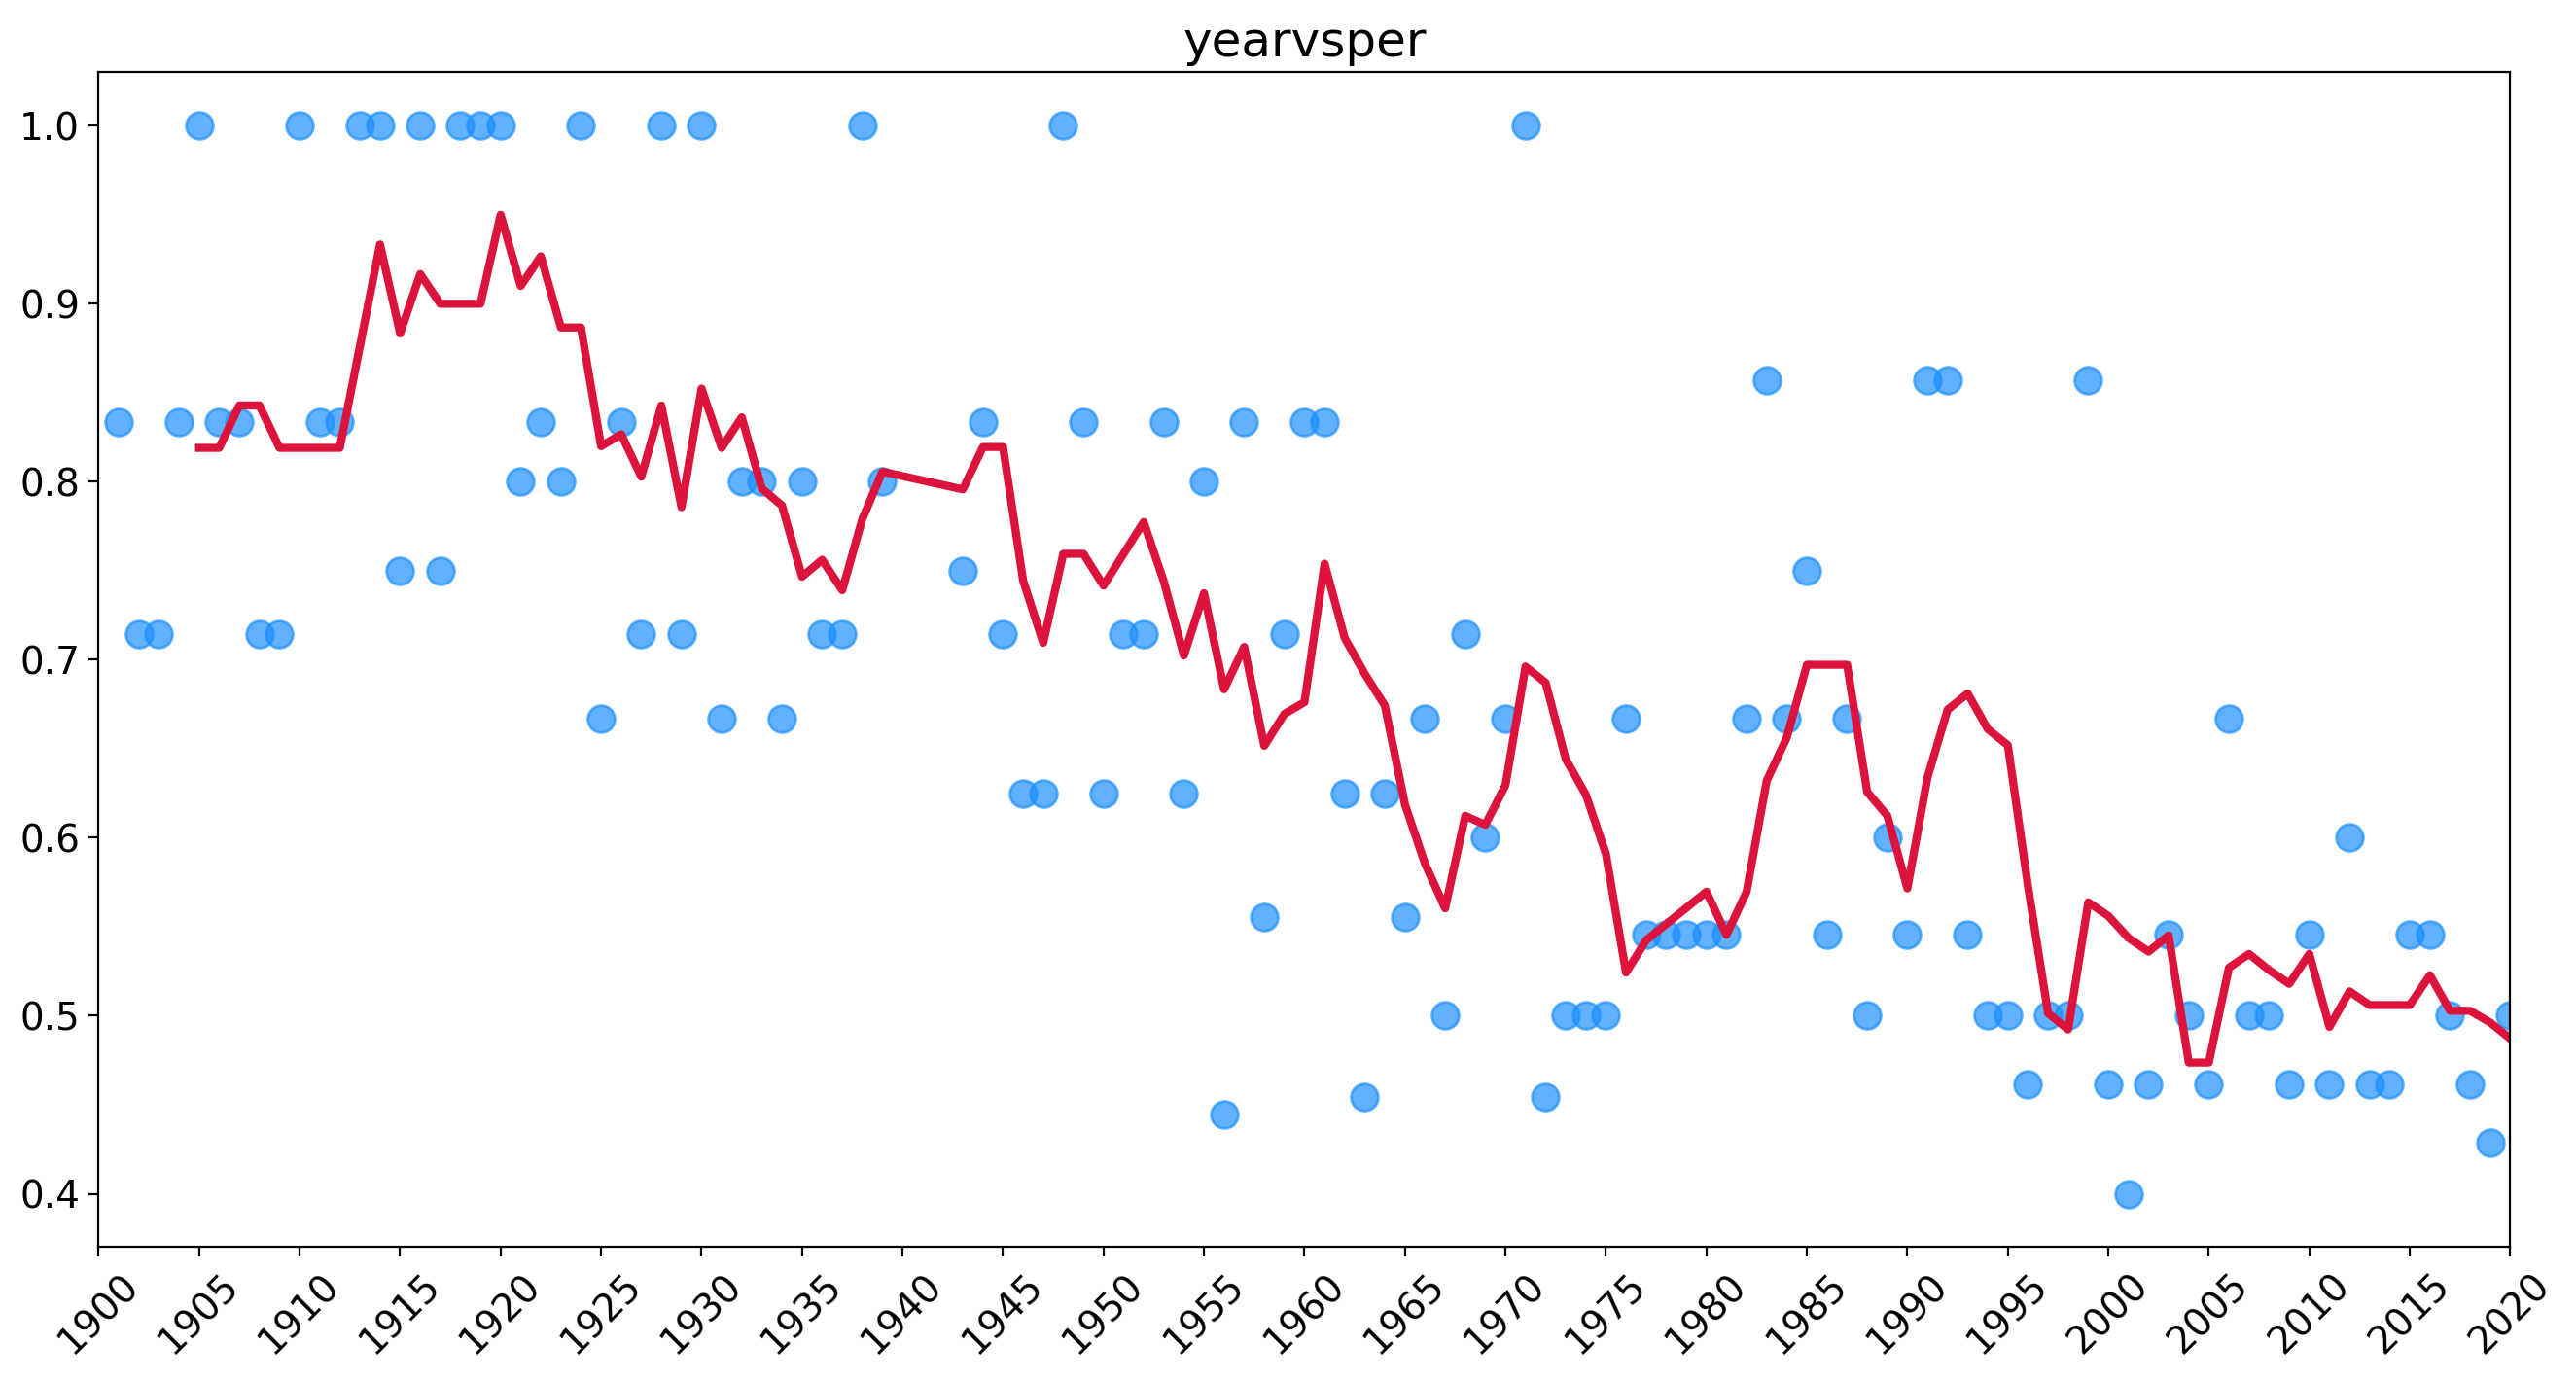

In [26]:
plt.figure(figsize=(16,8),dpi=200)
plt.title("yearvsper",fontsize=18,)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900,2021,step=5),fontsize=14,rotation=45)
ax=plt.gca()
ax.set_xlim(1900,2020)
ax.scatter(x=yper.index,y=yper.values, c='dodgerblue',alpha=0.7,s=100)
ax.plot(rollper.index,rollper.values, c='crimson',linewidth=3)
plt.show()

NameError: ignored

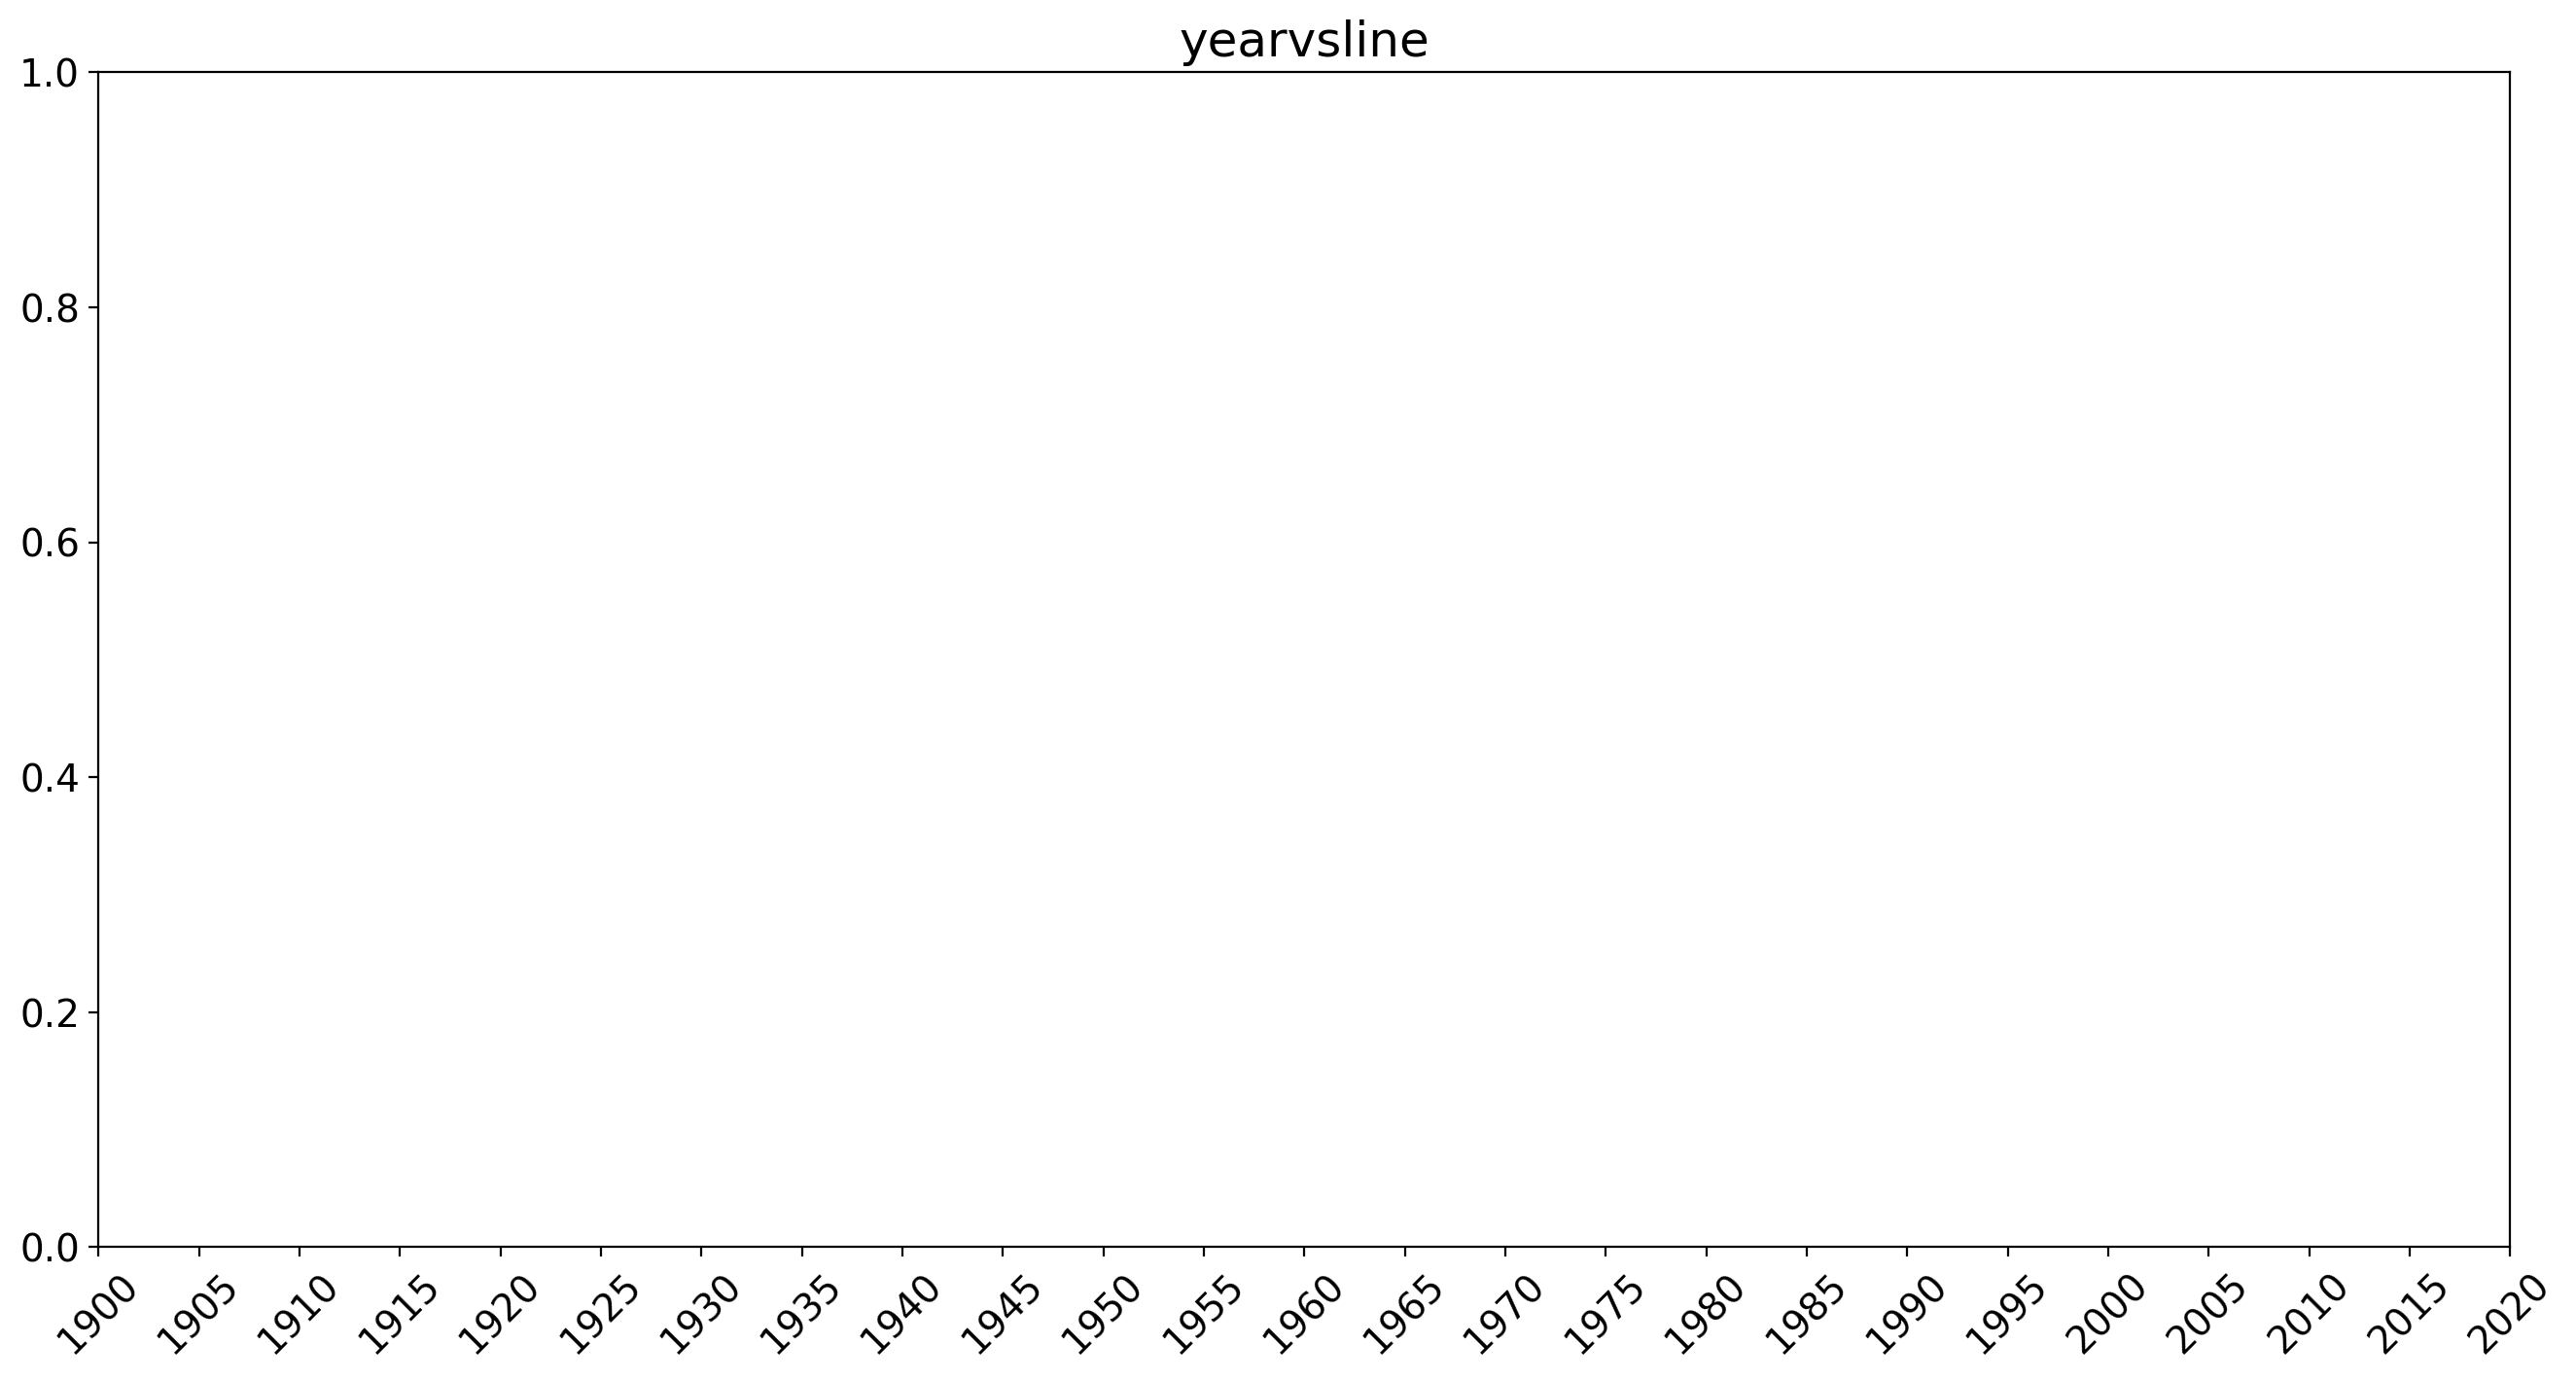

In [27]:
plt.figure(figsize=(16,8),dpi=200)
plt.title("yearvsline",fontsize=18,)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900,2021,step=5),fontsize=14,rotation=45)
ax=plt.gca()
ax.set_xlim(1900,2020)
ax.scatter(x=yp.index,y=yp.prize, c='dodgerblue',alpha=0.7,s=100)
ax.plot(roll.index,roll.prize, c='crimson',linewidth=3)

ax2=ax.twinx()
ax2.invert_yaxis()
ax2.plot(roll.index,rollper.values, c='grey',linewidth=3)
plt.show()

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [29]:
country=df_data.groupby('birth_country_current').agg({'prize':pd.Series.count}).sort_values('prize')[-10:]
country
country

,prize
birth_country_current,
Switzerland,19
Canada,20
Russia,26
Japan,27
Poland,27
Sweden,29
France,57
Germany,84
United Kingdom,105


In [30]:
h_bar=px.bar(y=country.index,x=country.prize, orientation='h',
       color=country.prize,
       color_continuous_scale='Viridis',
               title='Top 20 Countries by Number of Prizes')

h_bar.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='Country',
                    coloraxis_showscale=False)

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [31]:
countryiso=df_data.groupby('ISO').agg({'prize':pd.Series.count}).sort_values('prize')
countryiso

,prize
ISO,
IRQ,1
GLP,1
GRC,1
HRV,1
IDN,1
...,...
SWE,29
FRA,57
DEU,84


In [32]:
fig = px.choropleth(countryiso, locations=countryiso.index,
                    color="prize", # lifeExp is a column of gapminder
                    # hover_name="country", # column to add to hover information
                    color_continuous_scale='matter')
fig.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [33]:
countrycat=df_data.groupby('birth_country_current','category').agg({'prize':pd.Series.count}).sort_values('prize')[-10:]
countrycat

ValueError: ignored

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [47]:
df_data

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning age,winning_age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00,49.00,49.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00,62.00,62.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00,47.00,47.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50,79.00,79.00
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50,73.00,73.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR,0.33,71.00,71.00
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA,0.25,55.00,55.00
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU,0.25,68.00,68.00


# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [49]:
new=df_data


In [50]:
# new['winning_age']=new.year-new.birth_date.dt.year
new

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning age,winning_age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00,49.00,49.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00,62.00,62.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00,47.00,47.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50,79.00,79.00
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50,73.00,73.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR,0.33,71.00,71.00
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA,0.25,55.00,55.00
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU,0.25,68.00,68.00


In [51]:
new.sort_values('winning_age')

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning age,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,0.50,17.00,17.00
85,1915,Physics,The Nobel Prize in Physics 1915,"""for their services in the analysis of crystal...",1/2,Individual,William Lawrence Bragg,1890-03-31,Adelaide,Australia,Australia,Male,Victoria University,Manchester,United Kingdom,AUS,0.50,25.00,25.00
932,2018,Peace,The Nobel Peace Prize 2018,“for their efforts to end the use of sexual vi...,1/2,Individual,Nadia Murad,1993-07-02,Kojo,Iraq,Iraq,Female,NaN,NaN,NaN,IRQ,0.50,25.00,25.00
305,1957,Physics,The Nobel Prize in Physics 1957,"""for their penetrating investigation of the so...",1/2,Individual,Tsung-Dao (T.D.) Lee,1926-11-24,Shanghai,China,China,Male,Columbia University,"New York, NY",United States of America,CHN,0.50,31.00,31.00
171,1933,Physics,The Nobel Prize in Physics 1933,"""for the discovery of new productive forms of ...",1/2,Individual,Paul Adrien Maurice Dirac,1902-08-08,Bristol,United Kingdom,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,GBR,0.50,31.00,31.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,2012,Peace,The Nobel Peace Prize 2012,"""for over six decades contributed to the advan...",1/1,Organization,European Union (EU),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN
873,2013,Peace,The Nobel Peace Prize 2013,"""for its extensive efforts to eliminate chemic...",1/1,Organization,Organisation for the Prohibition of Chemical W...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN
897,2015,Peace,The Nobel Peace Prize 2015,"""for its decisive contribution to the building...",1/1,Organization,National Dialogue Quartet,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN
919,2017,Peace,The Nobel Peace Prize 2017,“for its work to draw attention to the catastr...,1/1,Organization,International Campaign to Abolish Nuclear Weap...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN


In [54]:
new.sort_values('winning_age')[-3:]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning age,winning_age
897,2015,Peace,The Nobel Peace Prize 2015,"""for its decisive contribution to the building...",1/1,Organization,National Dialogue Quartet,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN
919,2017,Peace,The Nobel Peace Prize 2017,“for its work to draw attention to the catastr...,1/1,Organization,International Campaign to Abolish Nuclear Weap...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN


In [57]:
display(df_data.nlargest(n=2,columns='winning_age'))

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning age,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,0.33,97.00,97.00
933,2018,Physics,The Nobel Prize in Physics 2018,“for the optical tweezers and their applicatio...,1/2,Individual,Arthur Ashkin,1922-09-02,"New York, NY",United States of America,United States of America,Male,Bell Laboratories,"Holmdel, NJ",United States of America,USA,0.50,96.00,96.00


In [58]:
display(df_data.nsmallest(n=1,columns='winning_age'))

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning age,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,0.50,17.00,17.00


### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

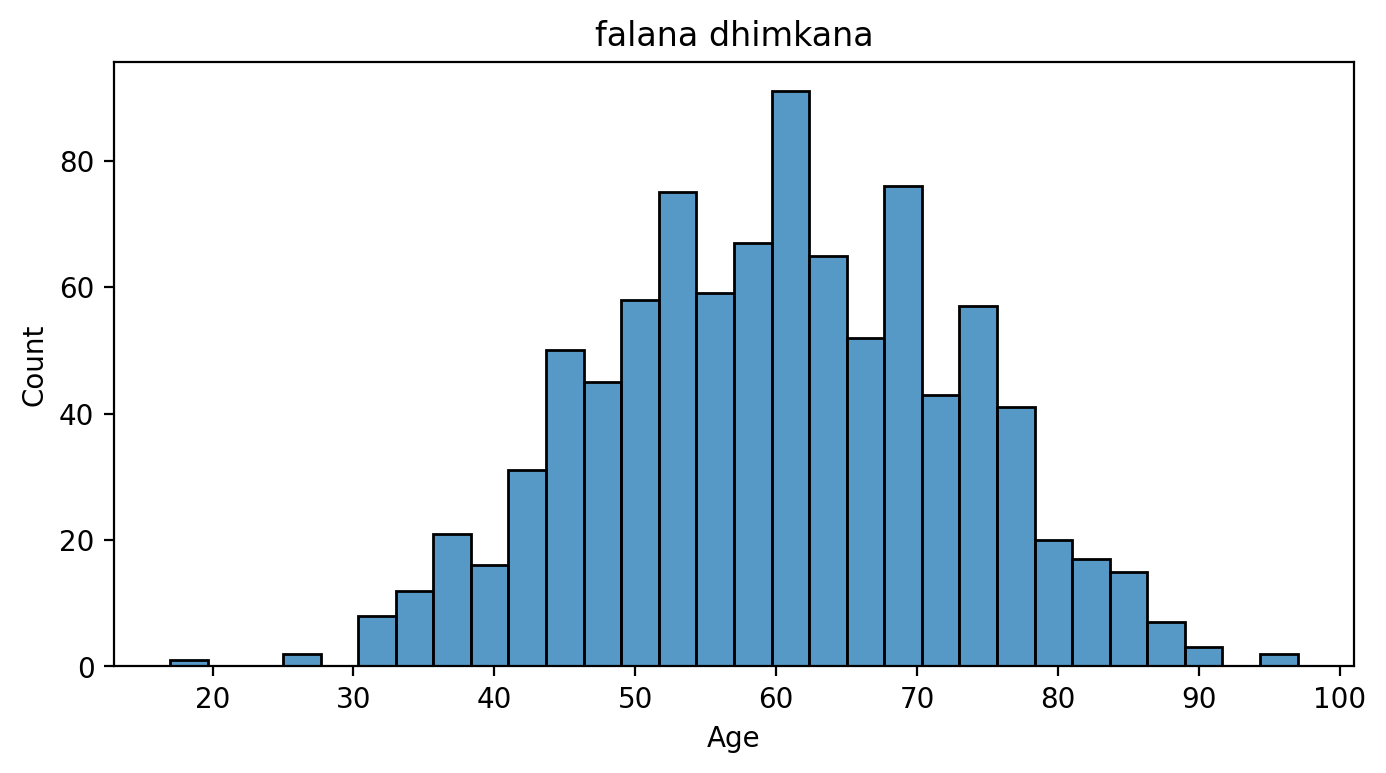

In [62]:
plt.figure(figsize=(8,4), dpi=200)
sns.histplot(data=df_data,
             x=df_data.winning_age,bins=30
             )
plt.xlabel('Age')
plt.title("falana dhimkana")
plt.show()

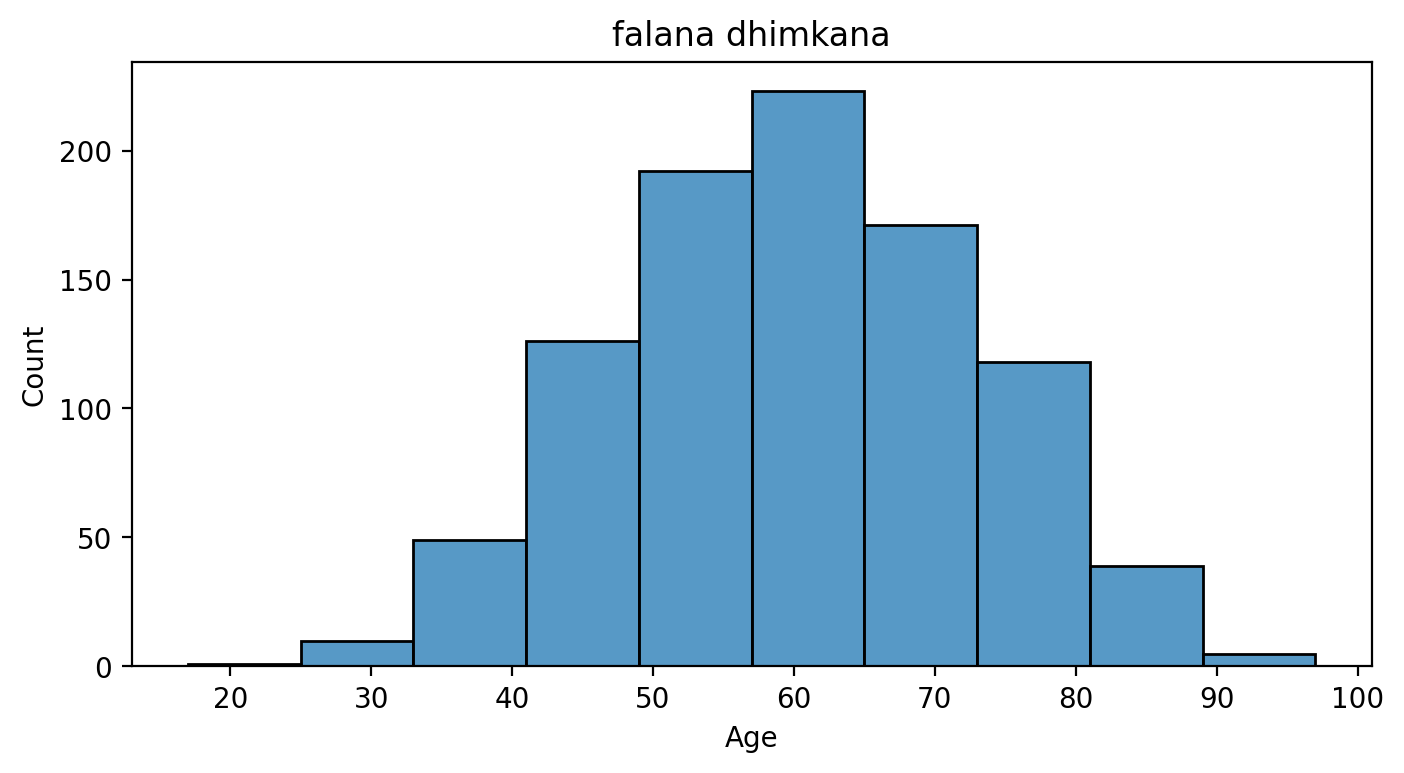

In [67]:
plt.figure(figsize=(8,4), dpi=200)
sns.histplot(data=df_data,
             x=df_data.winning_age,bins=10
             )
plt.xlabel('Age')
plt.title("falana dhimkana")
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


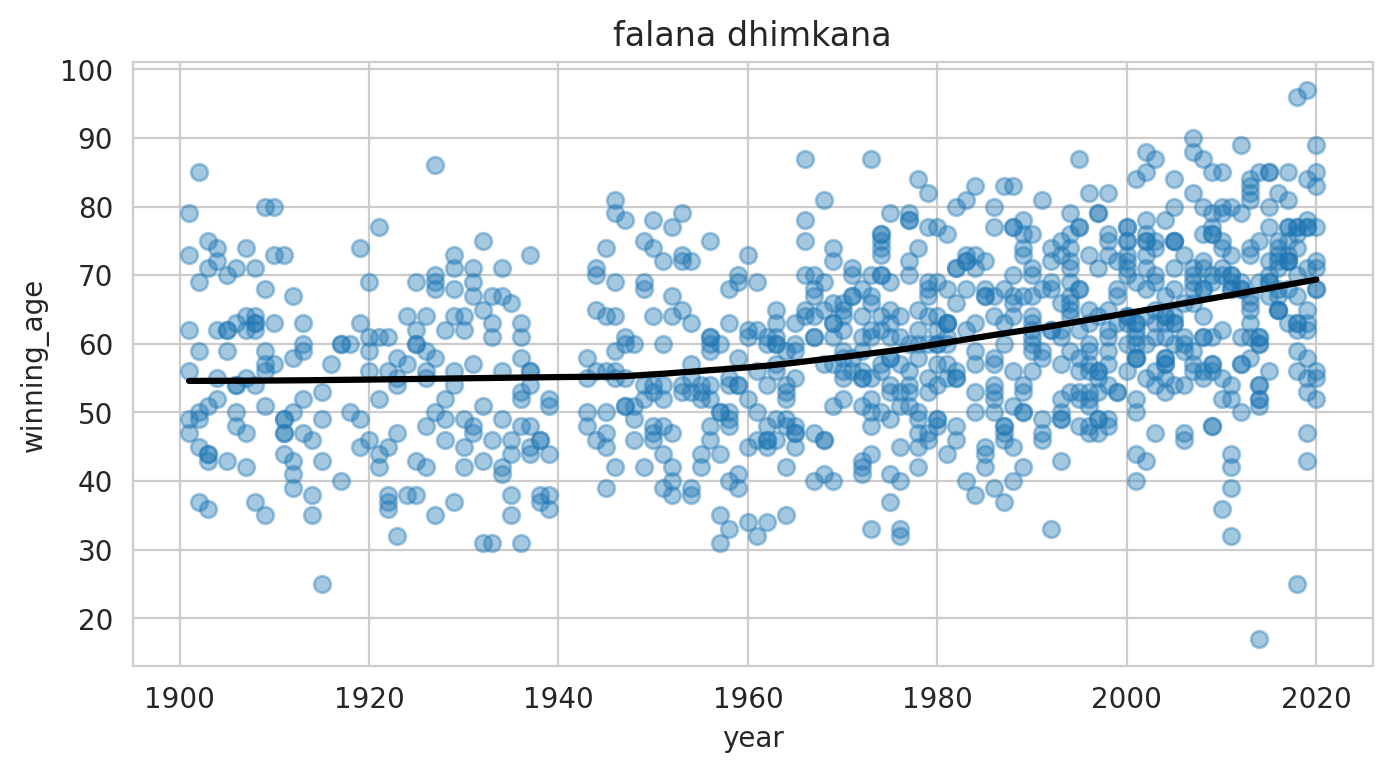

In [76]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):
  sns.regplot(data=df_data,
             y=df_data.winning_age,
            x=df_data.year,
            scatter_kws = {'alpha':0.4} ,
            lowess=True,
            line_kws={'color':'black'}
             )
plt.xlabel('year')
plt.title("falana dhimkana")
plt.show()

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

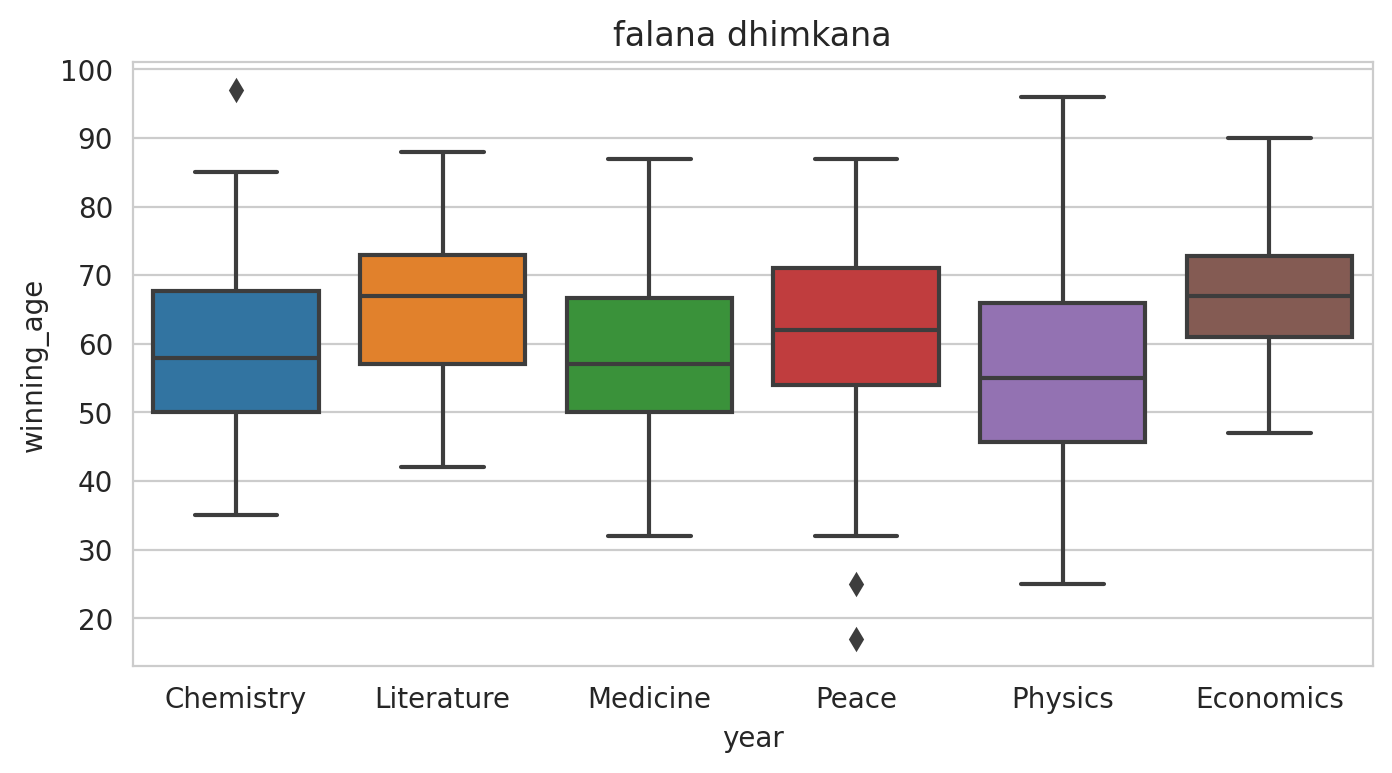

In [77]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):
  sns.boxplot(data=df_data,
             y=df_data.winning_age,
            x=df_data.category,
         
             )
plt.xlabel('year')
plt.title("falana dhimkana")
plt.show()

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


<Figure size 1600x800 with 0 Axes>

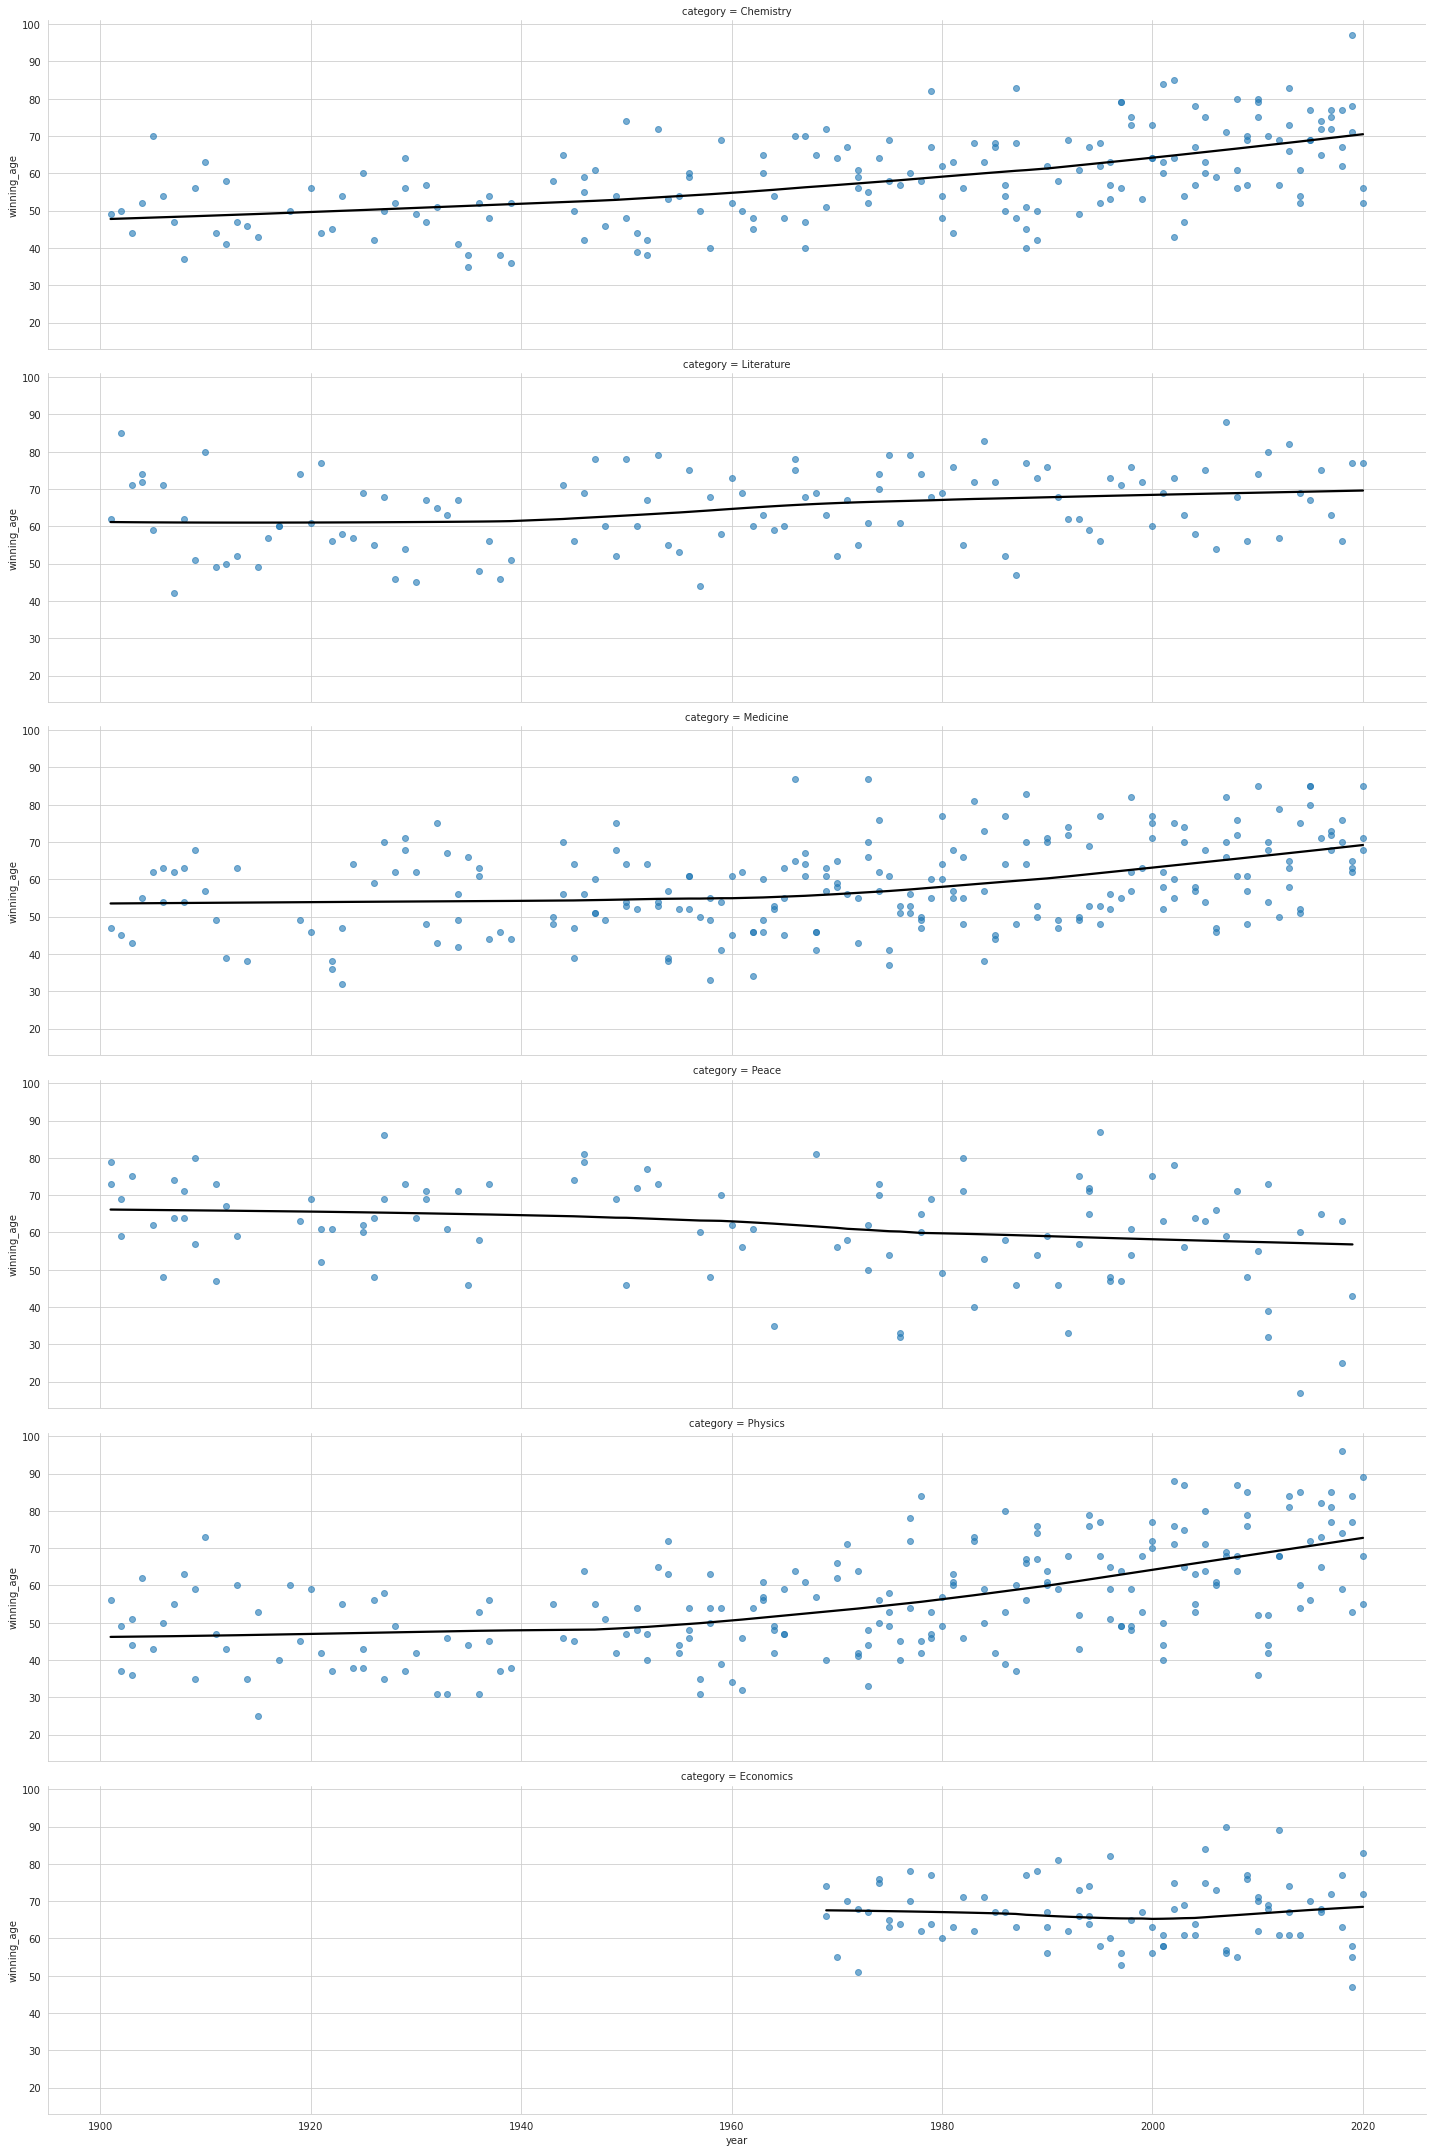

In [88]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):
  sns.lmplot(data=df_data,
             y='winning_age',
             x='year',
             row = 'category',
             lowess=True,
             aspect=4,
             scatter_kws = {'alpha': 0.6},
             line_kws={'color':'black'}
         
             )


<Figure size 1600x800 with 0 Axes>

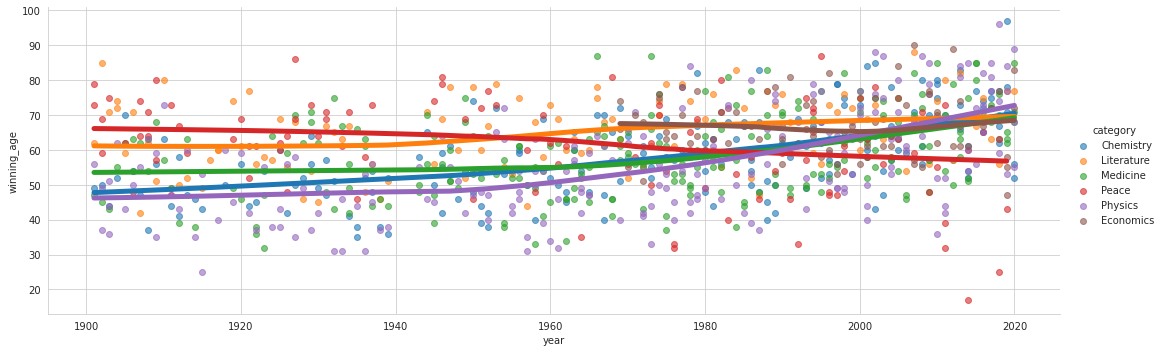

In [92]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):
  sns.lmplot(data=df_data,
             y='winning_age',
             x='year',
             hue = 'category',
             lowess=True,
             aspect=3,
             scatter_kws = {'alpha': 0.6},
             line_kws={'linewidth':5}
         
             )


In [129]:
prize_by_year = df_data.groupby(by=['birth_country_current', 'year']).count().groupby(level=[0]).cumsum()

# prize_by_year = df_data.groupby(by=['birth_country_current', 'year'],as_index=False).count().groupby('birth_country_current').cumsum()

# prize_by_year.reset_index(inplace=True)
prize_by_year[-30:]

category  prize  motivation  prize_share  \
birth_country_current    year                                             
United States of America 1994       162    162         147          162   
                         1995       168    168         153          168   
                         1996       173    173         158          173   
                         1997       179    179         164          179   
                         1998       183    183         168          183   
                         2000       188    188         173          188   
                         2001       196    196         181          196   
                         2002       201    201         186          201   
                         2003       205    205         190          205   
                         2004       212    212         197          212   
                         2005       217    217         202          217   
                         2006       223    223         208          223   
                         2007       226    226         211          226   
                         2008       229    229         214          229   
                         2009       235    235         220          235   
                         2010       238    238         223          238   
                         2011       244    244         229          244   
                         2012       249    249         234          249   
                         2013       254    254         239          254   
                         2014       257    257         242          257   
                         2015       258    258         243          258   
                         2016       259    259         244          259   
                         2017       265    265         250          265   
                         2018       271    271         256          271   
                         2019       274    274         259          274   
                         2020       281    281         266          281   
Venezuela                1980         1      1           1            1   
Vietnam                  1973         1      1           0            1   
Yemen                    2011         1      1           1            1   
Zimbabwe                 1960         1      1           0            1   

                               laureate_type  full_name  birth_date  \
birth_country_current    year                                         
United States of America 1994            162        162         162   
                         1995            168        168         168   
                         1996            173        173         173   
                         1997            179        179         179   
                         1998            183        183         183   
                         2000            188        188         188   
                         2001            196        196         196   
                         2002            201        201         201   
                         2003            205        205         205   
                         2004            212        212         212   
                         2005            217        217         217   
                         2006            223        223         223   
                         2007            226        226         226   
                         2008            229        229         229   
                         2009            235        235         235   
                         2010            238        238         238   
                         2011            244        244         244   
                         2012            249        249         249   
                         2013            254        254         254   
                         2014            257        257         257   
                         2015            258        258         258 

In [115]:
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]

In [119]:
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current',
                                              'year']).sum()
cumulative_prizes

category  prize  motivation  prize_share  \
birth_country_current    year                                             
Algeria                  1957         1      1           1            1   
                         1997         1      1           1            1   
Argentina                1936         1      1           0            1   
                         1947         1      1           1            1   
                         1980         1      1           0            1   
...                                 ...    ...         ...          ...   
United States of America 2020         7      7           7            7   
Venezuela                1980         1      1           1            1   
Vietnam                  1973         1      1           0            1   
Yemen                    2011         1      1           1            1   
Zimbabwe                 1960         1      1           0            1   

                               laureate_type  full_name  birth_date  \
birth_country_current    year                                         
Algeria                  1957              1          1           1   
                         1997              1          1           1   
Argentina                1936              1          1           1   
                         1947              1          1           1   
                         1980              1          1           1   
...                                      ...        ...         ...   
United States of America 2020              7          7           7   
Venezuela                1980              1          1           1   
Vietnam                  1973              1          1           1   
Yemen                    2011              1          1           1   
Zimbabwe                 1960              1          1           1   

                               birth_city  birth_country  sex  \
birth_country_current    year                                   
Algeria                  1957           1              1    1   
                         1997           1              1    1   
Argentina                1936           1              1    1   
                         1947           1              1    1   
                         1980           1              1    1   
...                                   ...            ...  ...   
United States of America 2020           7              7    7   
Venezuela                1980           1              1    1   
Vietnam                  1973           1              1    1   
Yemen                    2011           1              1    1   
Zimbabwe                 1960           1              1    1   

                               organization_name  organization_city  \
birth_country_current    year                                         
Algeria                  1957                  0                  0   
                         1997                  1                  1   
Argentina                1936                  0                  0   
                         1947                  1                  1   
                         1980                  0                  0   
...                                          ...                ...   
United States of America 2020                  6                  6   
Venezuela                1980                  1                  1   
Vietnam                  1973                  0                  0   
Yemen                    2011                  0                  0   
Zimbabwe                 1960                  0                  0   

                               organization_country  ISO  share_pct  \
birth_country_current    year                                         
Algeria                  1957                     0    1          1   
                         1997                     1    1          1   
Argentina                1936                     0    1          1   
      

In [124]:
l_chart = px.line(prize_by_year,
                  x='year', 
                  y='prize',
                  color='birth_country_current',
                  hover_name='birth_country_current')
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Prizes')
 
l_chart.show()